In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nyt_jan_2017 = pd.read_csv('./Satire_data/NYT/ArticlesJan2017.csv')
print(nyt_jan_2017.shape)
nyt_jan_2017.head()

(850, 16)


,articleID,abstract,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL,articleWordCount
0,58691a5795d0e039260788b9,NaN,By JENNIFER STEINHAUER,article,G.O.P. Leadership Poised to Topple Obama’s Pi...,"['United States Politics and Government', 'Law...",1,National,1,2017-01-01 15:03:38,Politics,The most powerful and ambitious Republican-led...,The New York Times,News,https://www.nytimes.com/2017/01/01/us/politics...,1324
1,586967bf95d0e03926078915,NaN,By MARK LANDLER,article,Fractured World Tested the Hope of a Young Pre...,"['Obama, Barack', 'Afghanistan', 'United State...",1,Foreign,1,2017-01-01 20:34:00,Asia Pacific,A strategy that went from a “good war” to the ...,The New York Times,News,https://www.nytimes.com/2017/01/01/world/asia/...,2836
2,58698a1095d0e0392607894a,NaN,By CAITLIN LOVINGER,article,Little Troublemakers,"['Crossword Puzzles', 'Boxing Day', 'Holidays ...",1,Games,0,2017-01-01 23:00:24,Unknown,Chuck Deodene puts us in a bubbly mood.,The New York Times,News,https://www.nytimes.com/2017/01/01/crosswords/...,445
3,5869911a95d0e0392607894e,NaN,By JOCHEN BITTNER,article,"Angela Merkel, Russia’s Next Target","['Cyberwarfare and Defense', 'Presidential Ele...",1,OpEd,15,2017-01-01 23:30:27,Unknown,"With a friend entering the White House, Vladim...",The New York Times,Op-Ed,https://www.nytimes.com/2017/01/01/opinion/ang...,864
4,5869a61795d0e03926078962,NaN,By JIAYIN SHEN,article,Boots for a Stranger on a Bus,"['Shoes and Boots', 'Buses', 'New York City']",0,Metro,12,2017-01-02 01:00:02,Unknown,Witnessing an act of generosity on a rainy day.,The New York Times,Brief,https://www.nytimes.com/2017/01/01/nyregion/me...,309


In [3]:
# Identifying number of columns in each df

nyt_jan_2018 = pd.read_csv('./Satire_data/NYT/ArticlesJan2018.csv')
print(nyt_jan_2018.shape)

nyt_feb_2017 = pd.read_csv('./Satire_data/NYT/ArticlesFeb2017.csv')
print(nyt_feb_2017.shape)
nyt_feb_2018 = pd.read_csv('./Satire_data/NYT/ArticlesFeb2018.csv')
print(nyt_feb_2018.shape)

nyt_mar_2017 = pd.read_csv('./Satire_data/NYT/ArticlesMarch2017.csv')
print(nyt_mar_2017.shape)
nyt_mar_2018 = pd.read_csv('./Satire_data/NYT/ArticlesMarch2018.csv')
print(nyt_mar_2018.shape)

nyt_apr_2017 = pd.read_csv('./Satire_data/NYT/ArticlesApril2017.csv')
print(nyt_apr_2017.shape)
nyt_apr_2018 = pd.read_csv('./Satire_data/NYT/ArticlesApril2018.csv')
print(nyt_apr_2018.shape)

nyt_may_2017 = pd.read_csv('./Satire_data/NYT/ArticlesMay2017.csv')
print(nyt_may_2017.shape)

(905, 16)
(885, 16)
(1155, 15)
(949, 16)
(1385, 15)
(886, 16)
(1324, 15)
(996, 16)


In [5]:
# Looking for which is the 16th column

def finding_cols(df):
    different_cols = []
    for col in df.columns:
        if col not in nyt_feb_2018.columns: # since this is one df with the fewest # of columns
            different_cols.append(col)
    return different_cols

finding_cols(nyt_jan_2018)

['abstract']

In [19]:
# Dropping unnecessary columns
# Dropping: 'abstract', 'articleID', 'byline', 'documentType', 'multimedia', 'printPage', 'snippet', 
# Keeping:  'articleWordCount', 'headline', 'keywords', 'newDesk', 'pubDate', 'sectionName', 'source', 
#           'typeOfMaterial', 'webURL' (9 total)

nyt_cols_to_drop = ['abstract', 'articleID', 'byline', 'documentType', 'multimedia', 'printPage', 'snippet']
nyt_cols_no_abstract = ['articleID', 'byline', 'documentType', 'multimedia', 'printPage', 'snippet']

def dropping_nyt_cols(df):
    if len(df.columns) == 16:
        df.drop(columns=nyt_cols_to_drop, axis=1, inplace=True)
    elif len(df.columns) == 15:
        df.drop(columns=nyt_cols_no_abstract, axis=1, inplace=True)

In [20]:
dropping_nyt_cols(nyt_jan_2017)
dropping_nyt_cols(nyt_jan_2018)
dropping_nyt_cols(nyt_feb_2017)
dropping_nyt_cols(nyt_feb_2018)
dropping_nyt_cols(nyt_mar_2017)
dropping_nyt_cols(nyt_mar_2018)
dropping_nyt_cols(nyt_apr_2017)
dropping_nyt_cols(nyt_apr_2018)
dropping_nyt_cols(nyt_may_2017)

In [23]:
# Combining all dfs into one

nyt_dfs = [nyt_jan_2017, nyt_jan_2018, nyt_feb_2017, nyt_feb_2018, nyt_mar_2017, nyt_mar_2018, nyt_apr_2017,
           nyt_apr_2018, nyt_may_2017]

nyt_final = pd.concat(nyt_dfs)

In [49]:
# Saving new, final df as CSV

nyt_final.to_csv(path_or_buf='NYT_final_articles.csv')

In [43]:
def basic_eda (df):
    print('Shape:') 
    print(df.shape)
    print('------------------------------------------')
    print('Column Info:')
    print(df.info())
    print('------------------------------------------')
    print('Null Values per Column')
    print(df.isnull().sum())
    print('------------------------------------------')
    print('Describe:')
    print(df.describe().T)
    for i in df:
        print('------------------------------------------')
        print('Values per Column:')
        print(i)
        print(df[i].value_counts())

In [44]:
basic_eda(nyt_final)

Shape:
(9335, 9)
------------------------------------------
Column Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9335 entries, 0 to 995
Data columns (total 9 columns):
articleWordCount    9335 non-null int64
headline            9335 non-null object
keywords            9335 non-null object
newDesk             9335 non-null object
pubDate             9335 non-null object
sectionName         9335 non-null object
source              9335 non-null object
typeOfMaterial      9335 non-null object
webURL              9335 non-null object
dtypes: int64(1), object(8)
memory usage: 729.3+ KB
None
------------------------------------------
Null Values per Column
articleWordCount    0
headline            0
keywords            0
newDesk             0
pubDate             0
sectionName         0
source              0
typeOfMaterial      0
webURL              0
dtype: int64
------------------------------------------
Describe:
                   count         mean         std   min    25%     

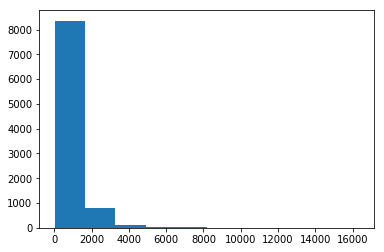

In [47]:
# Only one non-string column currently. Plotting accordingly

plt.hist(x=nyt_final['articleWordCount']);